# Linear Regression in Action 

To predict a best fit line through the data points that minimises the errors between  predicted and actual values of target variables

#### Import Required libraries

In [48]:
import pandas as pd
import numpy as np
#for plotting and visualization
import  matplotlib.pyplot as plt
%matplotlib inline

#### Load and read the dataset

In [80]:
df=pd.read_csv('Salary_Data.csv')

In [81]:
#check the number of rows and columns of dataset
df.shape

(30, 2)

we have 30 rows and 2 columns in our Salary dataset

In [82]:
#view top few rows of dataset
df.head(3)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0


In [83]:
#check for any missing values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


we don't have any missing values in our dataset

#### Visualise the data and relationship between variables

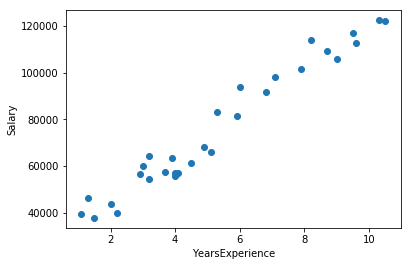

In [84]:
#use matplotlib to plot scatter plot between salary and work experience
plt.scatter(df['YearsExperience'],df['Salary'])
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

The graph clearly shows a positive correlation between work exp and salary .

In [85]:
#Correlation strength 
np.corrcoef(df['YearsExperience'],df['Salary'])

array([[ 1.        ,  0.97824162],
       [ 0.97824162,  1.        ]])

So , we have 0.97 coefficient of correlation between work exp and Salary 

In case , if did not have any other variable apart from Salary , the best estimate of next prediction of Salary would be the mean value of Salary

In [86]:
np.mean(df.Salary)

76003.0

#### Feature Engineering

In [87]:
#create the input and output variables
#X =input variable that contains work exp
X=df[['YearsExperience']]
#y=output/target variable that contains salary
y=df[['Salary']]

In [88]:
#import the Linear Regression model from sklearn 
from sklearn.linear_model import LinearRegression

In [89]:
#build and train the Linear Regression model on our input and output data (X,y)
lr=LinearRegression().fit(X,y)

In [90]:
#Accuracy of our LR model 
lr.score(X,y)

0.95695666414350844

So, our linear regression model has 95% accuracy in terms of predicting salary values

### Predictions

In [91]:
#create a new column which captures predicted values from LR model 
df['predicted_salary']=lr.predict(X)

In [92]:
df.head(3)

,YearsExperience,Salary,predicted_salary
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681


### Residuals (Errors)

In [93]:
#create an additional column to dataset which captures difference amount between actual and predicted salary values
df['residuals']=df['Salary']-df['predicted_salary']

In [94]:
df.head(3)

,YearsExperience,Salary,predicted_salary,residuals
0,1.1,39343.0,36187.158752,3155.841248
1,1.3,46205.0,38077.151217,8127.848783
2,1.5,37731.0,39967.143681,-2236.143681


### Squared residuals 

we have to square the residuals otherwise , sum of all residuals would result in zero 

In [95]:
#create an additional column that squares the residuals amount
df['sq_residuals']=df['residuals']*df['residuals']
    

In [96]:
df.head(3)

,YearsExperience,Salary,predicted_salary,residuals,sq_residuals
0,1.1,39343.0,36187.158752,3155.841248,9.959334e+06
1,1.3,46205.0,38077.151217,8127.848783,6.606193e+07
2,1.5,37731.0,39967.143681,-2236.143681,5.000339e+06


## Total sum of squared errors

In [97]:
#create a column which has mean value of salary 
df['mean_salary']=76003.0

In [98]:
df.head(3)

,YearsExperience,Salary,predicted_salary,residuals,sq_residuals,mean_salary
0,1.1,39343.0,36187.158752,3155.841248,9.959334e+06,76003.0
1,1.3,46205.0,38077.151217,8127.848783,6.606193e+07,76003.0
2,1.5,37731.0,39967.143681,-2236.143681,5.000339e+06,76003.0


In [99]:
#create a column with difference between salary value and mean salary value
df['errors']=df['Salary']-df['mean_salary']

In [100]:
#create the squared column of errors
df['sq_errors']=df['errors']*df['errors']

In [101]:
df.head(3)

,YearsExperience,Salary,predicted_salary,residuals,sq_residuals,mean_salary,errors,sq_errors
0,1.1,39343.0,36187.158752,3155.841248,9.959334e+06,76003.0,-36660.0,1.343956e+09
1,1.3,46205.0,38077.151217,8127.848783,6.606193e+07,76003.0,-29798.0,8.879208e+08
2,1.5,37731.0,39967.143681,-2236.143681,5.000339e+06,76003.0,-38272.0,1.464746e+09


### R- Square ( Coefficient of Determination )

In [104]:
SST =np.sum(df['sq_errors'])

In [105]:
SSE=np.sum(df['sq_residuals'])

In [106]:
#The variation explained due to Linear regression model 
SSR=SST-SSE

In [107]:
#ceofficient of determination (SSR/SST)
r_sq=SSR/SST

In [108]:
r_sq

0.95695666414350844

This is the same value which lr.score gave initially while training the model